trying the models on the synthetic database
 

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report



In [46]:
data = pd.read_csv('C:/Users/vishn/Downloads/archive/PS_20174392719_1491204439457_log.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [47]:
print(data['isFraud'].value_counts())


isFraud
0    6354407
1       8213
Name: count, dtype: int64


## Amount values for frauds vs non-frauds
the noticable difference could be because of the numebr of fraud vs non fraud values

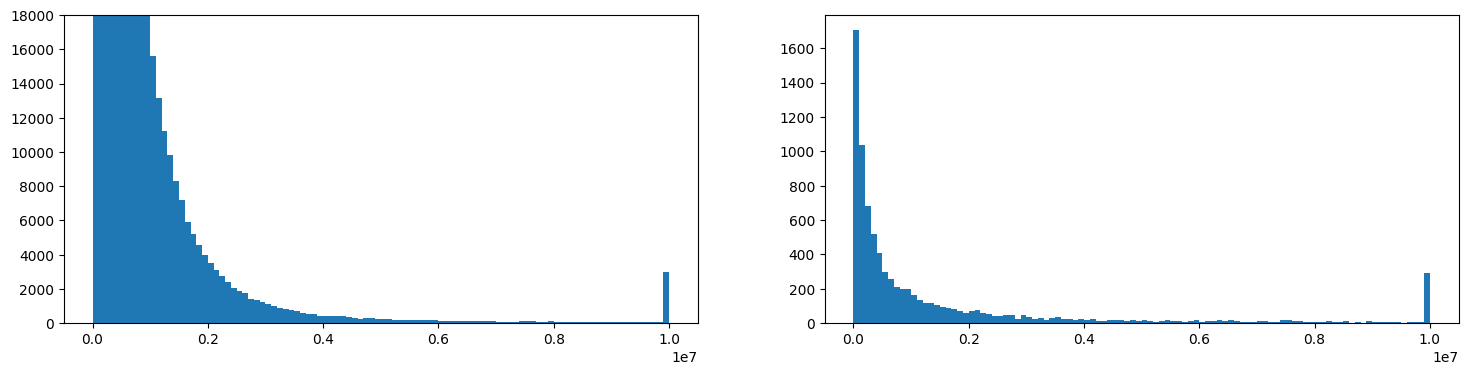

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
plt.subplot(1, 2, 1)
plt.ylim(0, 18000)


plt.hist(data[data['isFraud'] == 0]['amount'], bins=100,range=[0,1e+07])
plt.subplot(1, 2, 2)
plt.hist(data[data['isFraud'] == 1]['amount'], bins=100)
plt.show()


both seem to have a similar distribution. more samples in the non-fraud case causes an increased density at the lower values

## Discrepancy in the account balance difference and transaction amounts

number of entries where origin account balance difference is not equal to amount:  5433525
number of entries where destin account balance difference is not equal to amount:  5411570
number of entries where origin account balance difference is not equal to destin account balance difference:  5346209


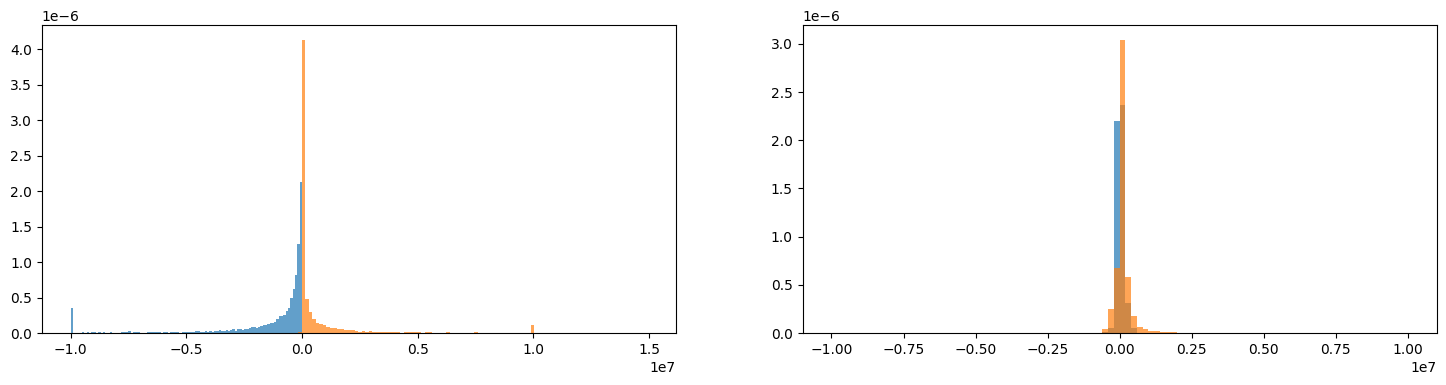

In [49]:
# checking if balance difference is zero for all transactions
print("number of entries where origin account balance difference is not equal to amount: ", data[abs(data['oldbalanceOrg']-data['newbalanceOrig']) != data['amount']].shape[0])
print("number of entries where destin account balance difference is not equal to amount: ", data[abs(data['oldbalanceDest']-data['newbalanceDest']) != data['amount']].shape[0])
print("number of entries where origin account balance difference is not equal to destin account balance difference: ", data[(abs(data['newbalanceOrig'] - data['oldbalanceOrg']) != abs(data['oldbalanceDest'] - data['newbalanceDest']))].shape[0])

#setting up subplots
fig, ax = plt.subplots(1, 2, figsize=(18,4))

plt.subplot(1, 2, 1)
plt.hist(data[data['isFraud'] == 1]['newbalanceOrig'] - data[data['isFraud'] == 1]['oldbalanceOrg'],bins=100, alpha=0.7, label="difference in origin acts for fraud", density=True)
plt.hist(data[data['isFraud'] == 1]['newbalanceDest'] - data[data['isFraud'] == 1]['oldbalanceDest'],bins=100, alpha=0.7, label="difference in dest acts for fraud", density=True)


plt.subplot(1, 2, 2)
plt.hist(data[data['isFraud'] == 0]['newbalanceOrig'] - data[data['isFraud'] == 0]['oldbalanceOrg'],bins=100, alpha=0.7, density=True, label="difference in origin acts for non-fraud",range=[-1e+07,1e+07])
plt.hist(data[data['isFraud'] == 0]['newbalanceDest'] - data[data['isFraud'] == 0]['oldbalanceDest'],bins=100, alpha=0.7, density=True, label="difference in dest acts for non-fraud",range=[-1e+07,1e+07])   
plt.show()


# frauds vs non-frauds across time steps

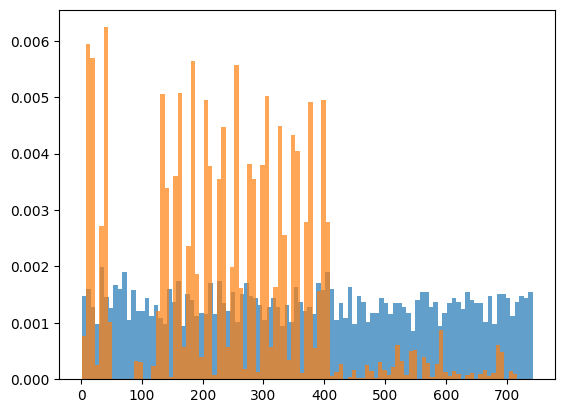

In [50]:

plt.hist(data[data['isFraud'] == 1]['step'],bins=100, alpha=0.7, label="fraud", density=True)
plt.hist(data[data['isFraud'] == 0]['step'],bins=100, alpha=0.7, label="fraud", density=True)
plt.show()

# frauds are more evenly distributed across time steps compared to non-frauds


## distribution of features for the fraud class data poitns

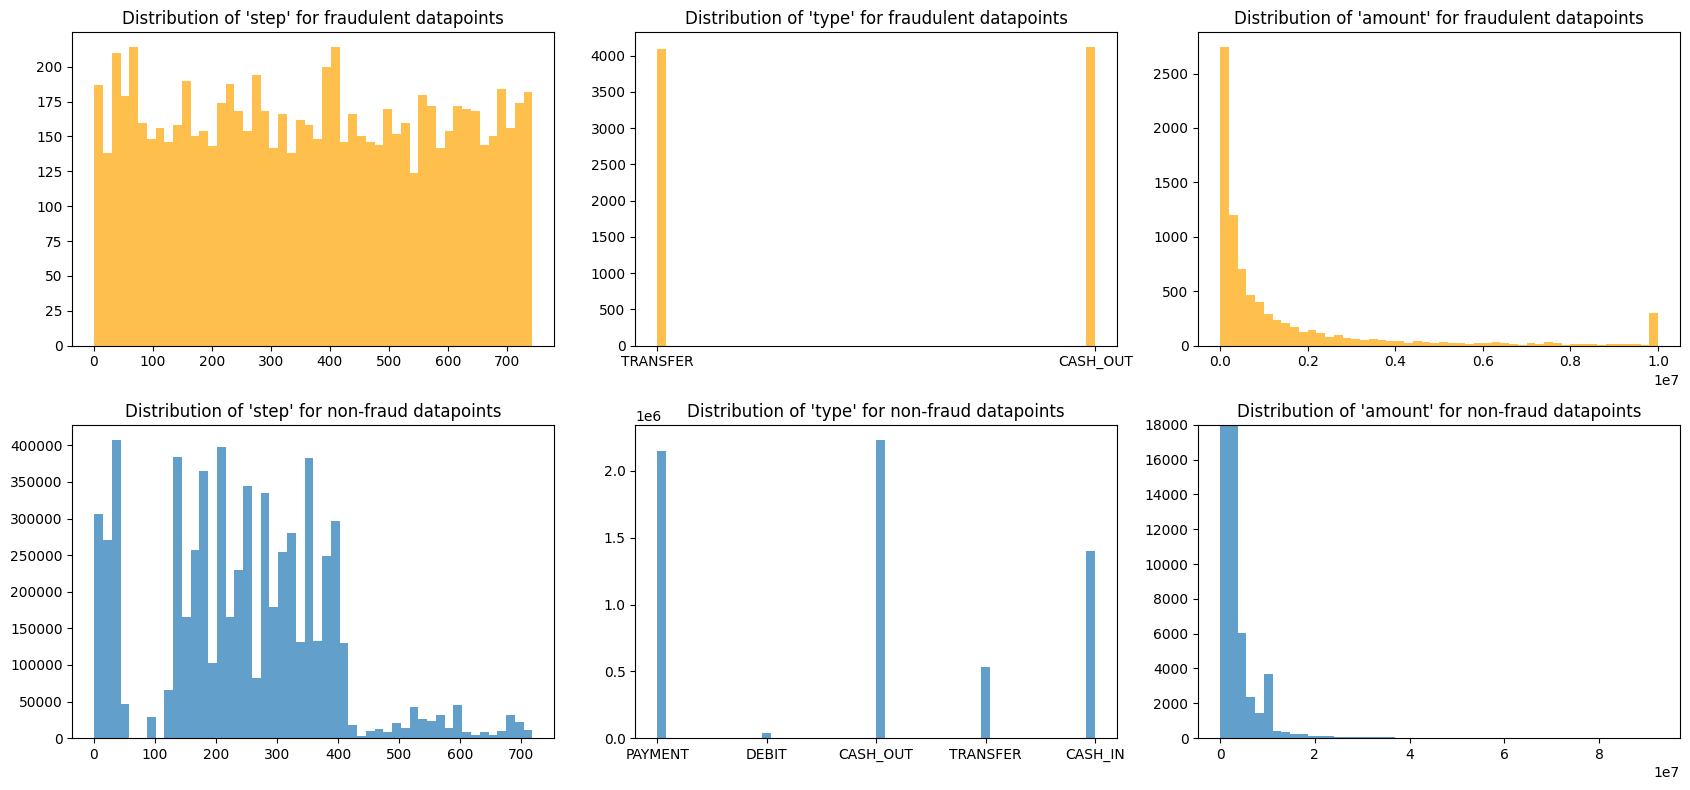

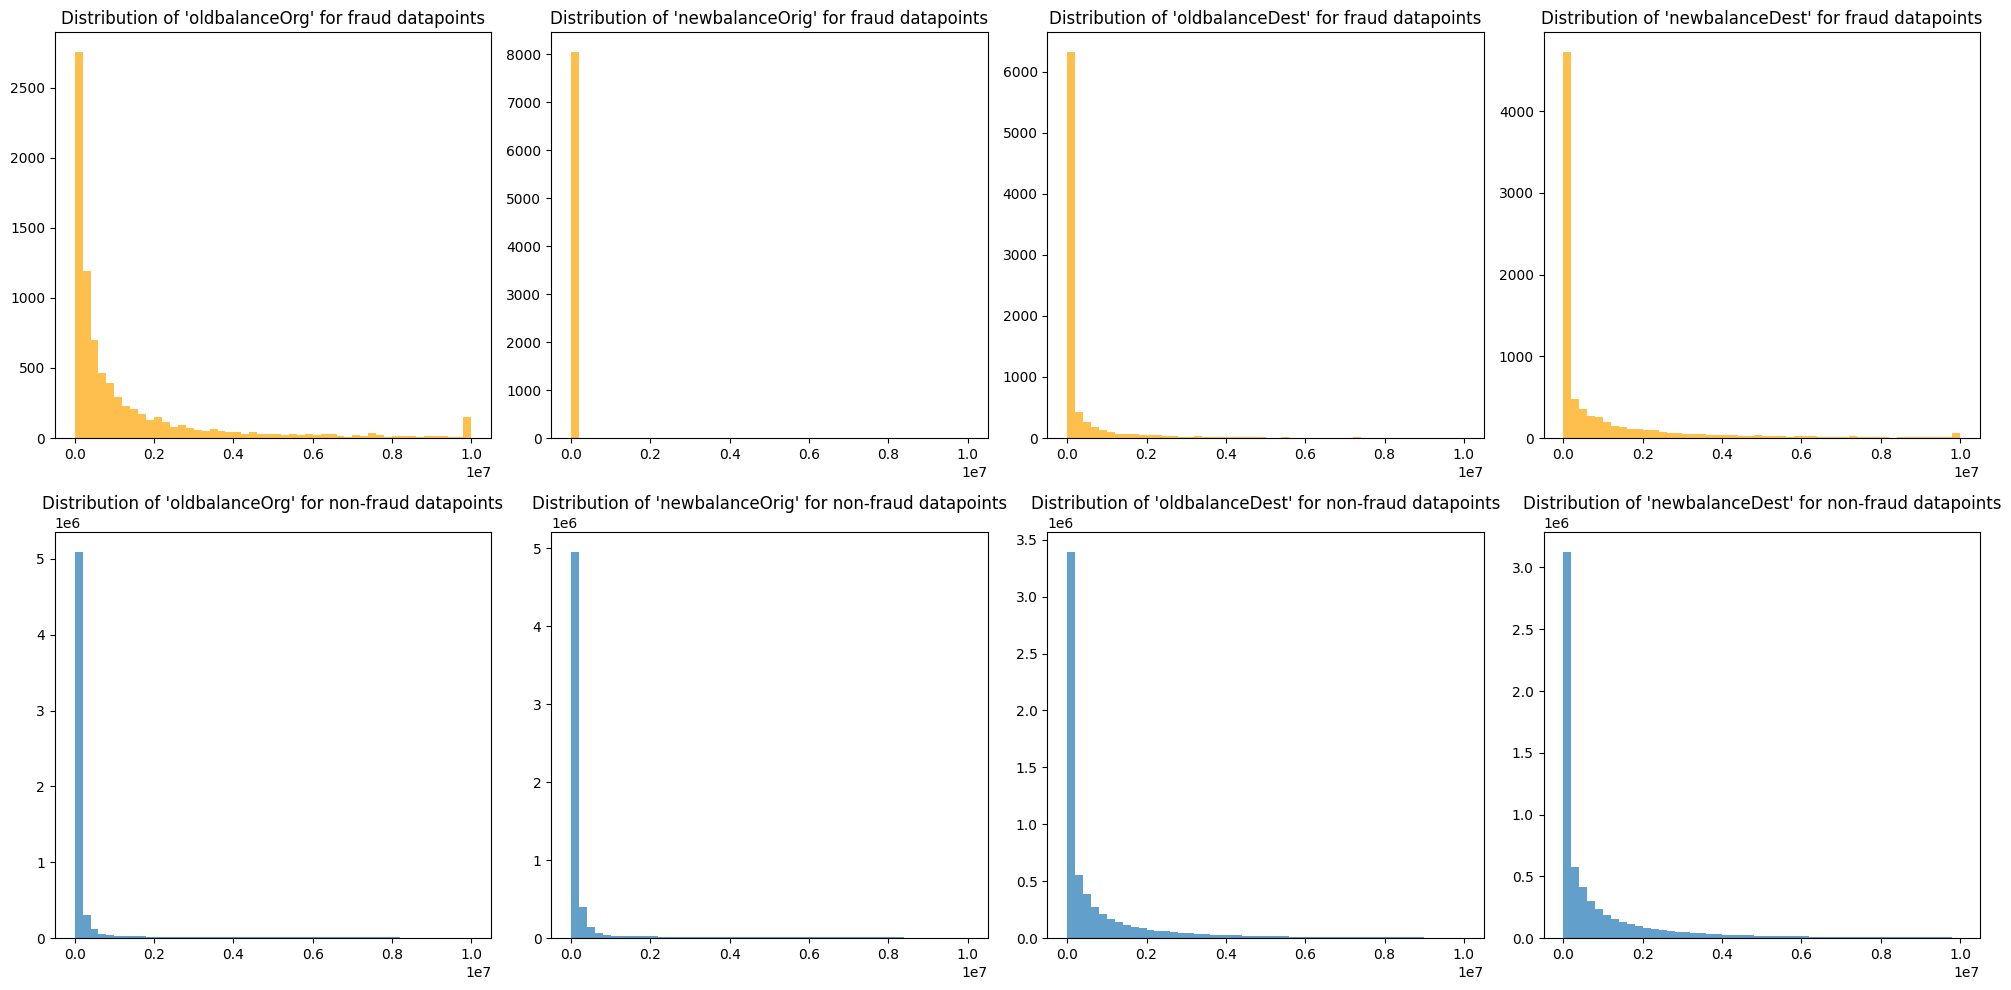

In [51]:
fig, ax = plt.subplots(2, 3, figsize=(17, 8))
for c, i in enumerate(['step', 'type', 'amount']):
    ax[0, c].hist(data[data['isFraud'] == 1][i], bins=50, alpha=0.7, color='orange')
    ax[0, c].set_title(f'Distribution of \'{i}\' for fraudulent datapoints')

    plt.ylim(0, 18000)
    ax[1, c].hist(data[data['isFraud'] == 0][i], bins=50, alpha=0.7)
    ax[1, c].set_title(f'Distribution of \'{i}\' for non-fraud datapoints')
    c += 1

plt.tight_layout()
plt.show()
features = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

fig, ax = plt.subplots(2, 4, figsize=(20, 10))

for c, i in enumerate(features):
    ax[0, c].hist(data[data['isFraud'] == 1][i], bins=50, range=[0, 1e+07], alpha=0.7, color='orange')
    ax[0, c].set_title(f'Distribution of \'{i}\' for fraud datapoints')
    
    ax[1, c].hist(data[data['isFraud'] == 0][i], bins=50, range=[0, 1e+07], alpha=0.7)
    ax[1, c].set_title(f'Distribution of \'{i}\' for non-fraud datapoints')

plt.tight_layout()
plt.show()

## Seperating i/o features and feature rescaling
also looks at correlation between features

TODO: need to encode categorical data.


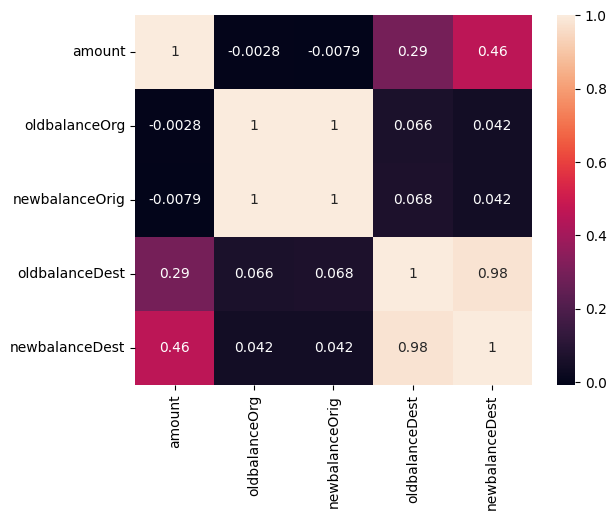

C:\Users\vishn\AppData\Local\Temp\ipykernel_22916\3225041648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,inputcols]=sc.transform(x[inputcols])


In [52]:
inputcols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
x = data[inputcols]
y = data['isFraud']


# max_amount = x['amount'].max()
# x['amount'] = x['amount']/max_amount
# print(x['amount'].describe())

correlation = x.corr()
sns.heatmap(correlation, annot=True)
plt.show()

sc=StandardScaler().fit(x[inputcols])
x.loc[:,inputcols]=sc.transform(x[inputcols])


In [53]:
print(x['amount'].describe())

count    6.362620e+06
mean    -4.946736e-17
std      1.000000e+00
min     -2.978545e-01
25%     -2.756812e-01
50%     -1.738653e-01
75%      4.779197e-02
max      1.527936e+02
Name: amount, dtype: float64


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
def fit_model_to_data(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Model:', model)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler



proportion of fraud and non fraud is highly skewed in the dataset. So rather than taking all of the non fraud data pountsm we undersample the non fraud data points to match the number of fraud data points.

In [56]:
undersample = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = undersample.fit_resample(x_train, y_train)
x_test_resampled, y_test_resampled=undersample.fit_resample(x_test,y_test)

x_train, y_train, x_test, y_test = x_resampled, y_resampled, x_test_resampled, y_test_resampled

In [57]:
fit_model_to_data(LogisticRegression())

Model: LogisticRegression()
Accuracy: 0.867481662591687
Confusion Matrix:
 [[2011   34]
 [ 508 1537]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      2045
           1       0.98      0.75      0.85      2045

    accuracy                           0.87      4090
   macro avg       0.89      0.87      0.87      4090
weighted avg       0.89      0.87      0.87      4090



In [58]:
fit_model_to_data(GaussianNB())

Model: GaussianNB()
Accuracy: 0.6591687041564792
Confusion Matrix:
 [[2004   41]
 [1353  692]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.98      0.74      2045
           1       0.94      0.34      0.50      2045

    accuracy                           0.66      4090
   macro avg       0.77      0.66      0.62      4090
weighted avg       0.77      0.66      0.62      4090



In [59]:
fit_model_to_data(DecisionTreeClassifier(max_depth=20))

Model: DecisionTreeClassifier(max_depth=20)
Accuracy: 0.9929095354523227
Confusion Matrix:
 [[2028   17]
 [  12 2033]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2045
           1       0.99      0.99      0.99      2045

    accuracy                           0.99      4090
   macro avg       0.99      0.99      0.99      4090
weighted avg       0.99      0.99      0.99      4090



In [60]:
fit_model_to_data(RandomForestClassifier(n_estimators=50))


Model: RandomForestClassifier(n_estimators=50)
Accuracy: 0.9916870415647921
Confusion Matrix:
 [[2021   24]
 [  10 2035]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2045
           1       0.99      1.00      0.99      2045

    accuracy                           0.99      4090
   macro avg       0.99      0.99      0.99      4090
weighted avg       0.99      0.99      0.99      4090



In [61]:
fit_model_to_data(GradientBoostingClassifier(n_estimators=50))

Model: GradientBoostingClassifier(n_estimators=50)
Accuracy: 0.9748166259168705
Confusion Matrix:
 [[1967   78]
 [  25 2020]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      2045
           1       0.96      0.99      0.98      2045

    accuracy                           0.97      4090
   macro avg       0.98      0.97      0.97      4090
weighted avg       0.98      0.97      0.97      4090



In [62]:
fit_model_to_data(XGBClassifier(n_estimators=50))

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy: 0.9867970660146699
Confusion Matrix:
 [[2006   39]
 [  15 2030]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2045
           1       0.98      